# Regressão 01 - tarefa 03 - transformações em X e Y

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
# Aplicando um polinomio de primeiro grau em net_bill, sem as variaveis sex, smoker e time, que segundo  o coeficiente valor-p é menor que 5% nesses casos
reg = smf.ols('tip ~ np.power(net_bill, 1)', data = tips).fit()

In [4]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        20:53:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3307      0.168      7.907      0.000       0.999       1.662
np.power(net_bill, 1)     0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

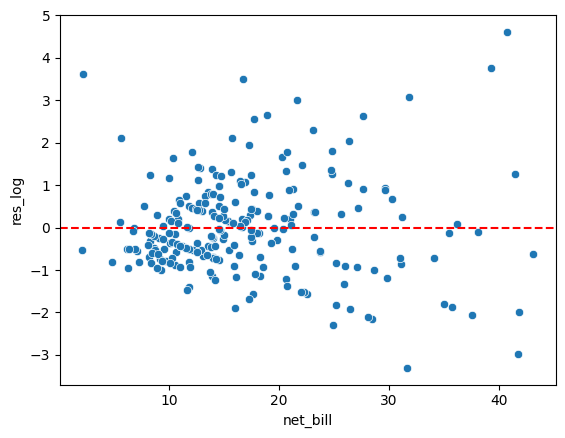

In [5]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [6]:
# Seria tip_pct? Vou considerar que sim, caso contrário é o mesmo exercício.

In [7]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()

In [8]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.62e-13
Time:                        20:53:08   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

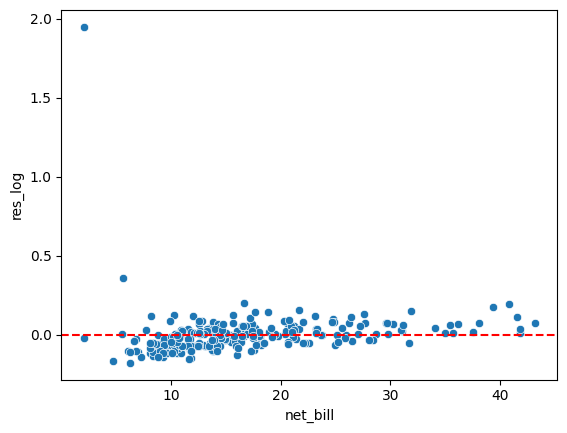

In [9]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [40]:
df_renda = pd.read_csv('previsao_de_renda.csv')
df_renda.fillna(0, inplace=True)

In [41]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [42]:
reg1 = smf.ols('np.log(renda) ~ (tempo_emprego)', data = df_renda).fit()

In [49]:
df_renda['res_tempoemprego'] = reg1.resid
predicted_values = reg1.predict()
df_renda['predicted_values'] = np.exp(predicted_values)

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3001.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:04:33   Log-Likelihood:                -18056.
No. Observations:               15000   AIC:                         3.612e+04
Df Residuals:                   14998   BIC:                         3.613e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8672      0.009    868.148      0.000       7.849       7.885
tempo_emprego     0.0533      0.001     54.785      0.000       0.051       0.055
==============================================================================
Omnibus:                       35.161   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.344
Skew:                           0.119   Prob(JB):                     2.11e-08
Kurtosis:                       3.019   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

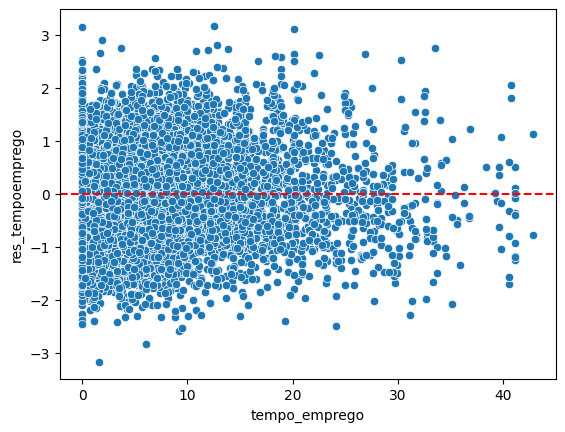

In [47]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_tempoemprego', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

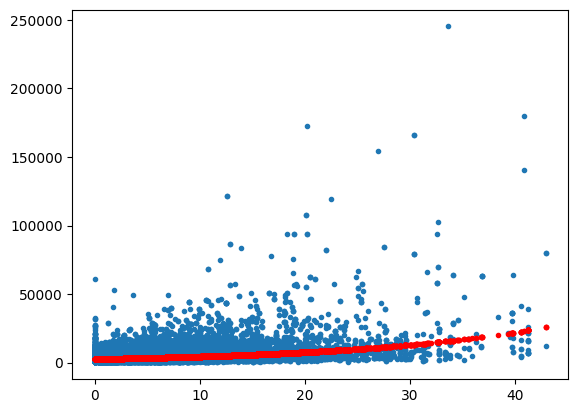

In [50]:
plt.plot(df_renda['tempo_emprego'], df_renda['renda'], '.')
plt.plot(df_renda['tempo_emprego'], df_renda['predicted_values'], 'r.')

In [15]:
## O Melhor resultado qual encontrei foi transformando o y em log, pensando que a renda pode ser algo que cresca exponenciamente.

In [16]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
 15  re

In [51]:
reg2 = smf.ols('np.log(renda) ~ tempo_emprego + sexo + posse_de_imovel + idade + estado_civil + tipo_renda', data = df_renda).fit()

In [60]:
df_renda['residuo_fin'] = reg2.resid
predicted_values = reg1.predict()
df_renda['predicted_values'] = np.exp(predicted_values)

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     651.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:10:55   Log-Likelihood:                -16278.
No. Observations:               15000   AIC:                         3.258e+04
Df Residuals:                   14987   BIC:                         3.268e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.2253      0.031    233.217      0.000       7.165       7.286
sexo[T.M]                          0.8042      0.013     61.569      0.000       0.779       0.830
posse_de_imovel[T.True]            0.0924      0.013      7.301      0.000       0.068       0.117
estado_civil[T.Separado]           0.0141      0.025      0.557      0.577      -0.036       0.064
estado_civil[T.Solteiro]          -0.0395      0.018     -2.150      0.032      -0.076      -0.003
estado_civil[T.União]             -0.0500      0.023     -2.174      0.030      -0.095      -0.005
estado_civil[T.Viúvo]              0.0112      0.029      0.389      0.698      -0.045       0.068
tipo_renda[T.Bolsista]             0.2696      0.239      1.127      0.260      -0.199       0.738
tipo_renda[T.Empresário]           0.1638      0.015     11.131      0.000       0.135       0.193
tipo_renda[T.Pensionista]          0.2812      0.024     11.824      0.000       0.235       0.328
tipo_renda[T.Servidor público]     0.0789      0.022      3.598      0.000       0.036       0.122
tempo_emprego                      0.0618      0.001     60.374      0.000       0.060       0.064
idade                              0.0040      0.001      5.636      0.000       0.003       0.005
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.070
Skew:                           0.011   Prob(JB):                        0.586
Kurtosis:                       3.035   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='sexo', ylabel='residuo_fin'>

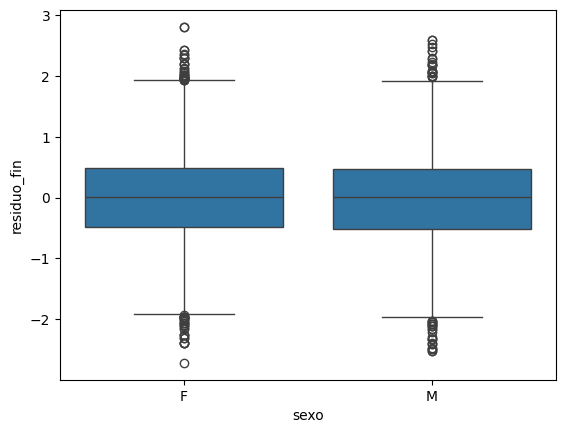

In [61]:
sns.boxplot(x = 'sexo', y = 'residuo_fin', data = df_renda)

<Axes: xlabel='estado_civil', ylabel='residuo_fin'>

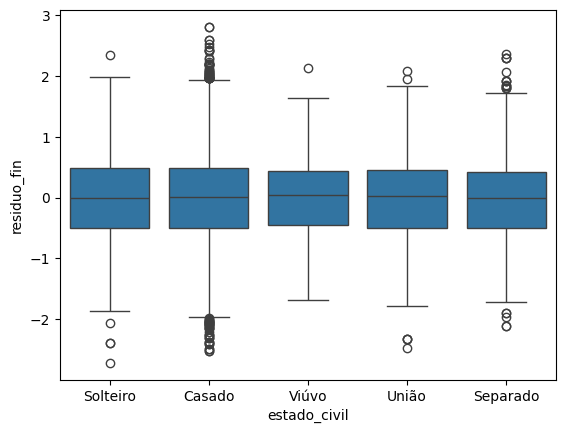

In [62]:
sns.boxplot(x = 'estado_civil', y = 'residuo_fin', data = df_renda)

<Axes: xlabel='tipo_renda', ylabel='residuo_fin'>

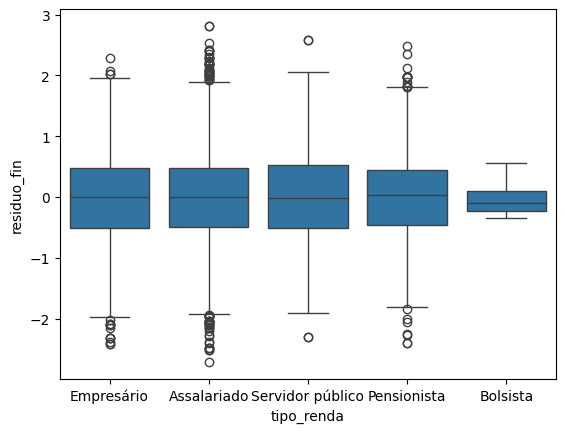

In [63]:
sns.boxplot(x = 'tipo_renda', y = 'residuo_fin', data = df_renda)

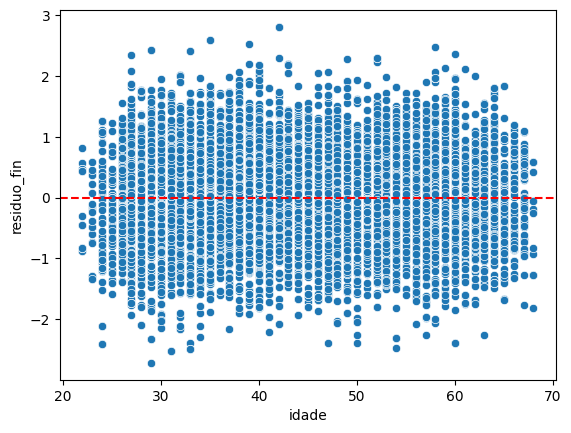

In [64]:
sns.scatterplot(x = 'idade', y = 'residuo_fin', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

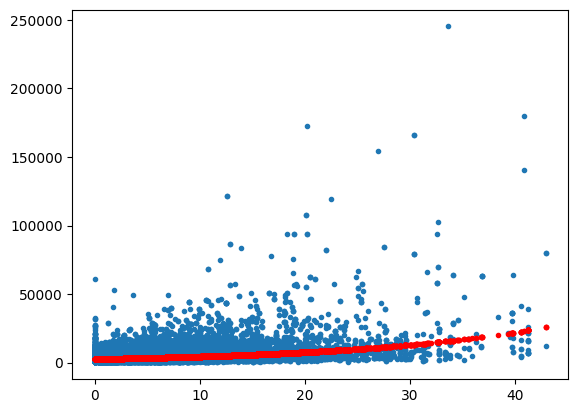

In [68]:
plt.plot(df_renda['tempo_emprego'], df_renda['renda'], '.')
plt.plot(df_renda['tempo_emprego'], df_renda['predicted_values'], 'r.')